# Importing necessary libraries

In [1]:
import re

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt




# Loading data

In [2]:
train= pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

In [3]:
test['price'] = -1

In [4]:
df = pd.concat([train,test])

In [5]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [6]:
df.tail()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes,-1
125686,314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,3.0 Liter Turbo,Automatic,White,Black,None reported,NaN,-1
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,-1
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,-1
125689,314222,Chevrolet,Tahoe LT,2018,66840,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Black,None reported,Yes,-1


In [7]:
df.shape

(314223, 13)

# Data Preprocessing Steps

## 1. lowercasing

In [8]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.lower()

In [9]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,mini,cooper s base,2007,213000,gasoline,172.0hp 1.6l 4 cylinder engine gasoline fuel,a/t,yellow,gray,none reported,yes,4200
1,1,lincoln,ls v8,2002,143250,gasoline,252.0hp 3.9l 8 cylinder engine gasoline fuel,a/t,silver,beige,at least 1 accident or damage reported,yes,4999
2,2,chevrolet,silverado 2500 lt,2002,136731,e85 flex fuel,320.0hp 5.3l 8 cylinder engine flex fuel capab...,a/t,blue,gray,none reported,yes,13900
3,3,genesis,g90 5.0 ultimate,2017,19500,gasoline,420.0hp 5.0l 8 cylinder engine gasoline fuel,transmission w/dual shift mode,black,black,none reported,yes,45000
4,4,mercedes-benz,metris base,2021,7388,gasoline,208.0hp 2.0l 4 cylinder engine gasoline fuel,7-speed a/t,black,beige,none reported,yes,97500


## 2. stripping

In [10]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()

In [11]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,mini,cooper s base,2007,213000,gasoline,172.0hp 1.6l 4 cylinder engine gasoline fuel,a/t,yellow,gray,none reported,yes,4200
1,1,lincoln,ls v8,2002,143250,gasoline,252.0hp 3.9l 8 cylinder engine gasoline fuel,a/t,silver,beige,at least 1 accident or damage reported,yes,4999
2,2,chevrolet,silverado 2500 lt,2002,136731,e85 flex fuel,320.0hp 5.3l 8 cylinder engine flex fuel capab...,a/t,blue,gray,none reported,yes,13900
3,3,genesis,g90 5.0 ultimate,2017,19500,gasoline,420.0hp 5.0l 8 cylinder engine gasoline fuel,transmission w/dual shift mode,black,black,none reported,yes,45000
4,4,mercedes-benz,metris base,2021,7388,gasoline,208.0hp 2.0l 4 cylinder engine gasoline fuel,7-speed a/t,black,beige,none reported,yes,97500


In [12]:
df.shape

(314223, 13)

## 3. splitting engine columns into hp, litre, cyclinder

In [13]:
def extract_engine_data(engine):
    hp_pattern = r'(\d+\.?\d*)hp'
    litre_pattern = r'(\d+\.?\d*)l'
    cylinder_pattern = r'(\d+)\scylinder'
    hp = re.search(hp_pattern, engine)
    litre = re.search(litre_pattern, engine)
    cylinder = re.search(cylinder_pattern, engine)

    hp_value = float(hp.group(1)) if hp else None
    litre_value = float(litre.group(1)) if litre else None
    cylinder_value = int(cylinder.group(1)) if cylinder else None

    return pd.Series([hp_value, litre_value, cylinder_value])

df[['hp', 'litre', 'cyclinder']] = df['engine'].apply(extract_engine_data)

In [14]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,hp,litre,cyclinder
0,0,mini,cooper s base,2007,213000,gasoline,172.0hp 1.6l 4 cylinder engine gasoline fuel,a/t,yellow,gray,none reported,yes,4200,172.0,1.6,4.0
1,1,lincoln,ls v8,2002,143250,gasoline,252.0hp 3.9l 8 cylinder engine gasoline fuel,a/t,silver,beige,at least 1 accident or damage reported,yes,4999,252.0,3.9,8.0
2,2,chevrolet,silverado 2500 lt,2002,136731,e85 flex fuel,320.0hp 5.3l 8 cylinder engine flex fuel capab...,a/t,blue,gray,none reported,yes,13900,320.0,5.3,8.0
3,3,genesis,g90 5.0 ultimate,2017,19500,gasoline,420.0hp 5.0l 8 cylinder engine gasoline fuel,transmission w/dual shift mode,black,black,none reported,yes,45000,420.0,5.0,8.0
4,4,mercedes-benz,metris base,2021,7388,gasoline,208.0hp 2.0l 4 cylinder engine gasoline fuel,7-speed a/t,black,beige,none reported,yes,97500,208.0,2.0,4.0


## 4. Dropping id and engine columns (no relevance)

In [15]:
df.drop(columns=['id','engine'],inplace=True)

In [16]:
df.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,hp,litre,cyclinder
0,mini,cooper s base,2007,213000,gasoline,a/t,yellow,gray,none reported,yes,4200,172.0,1.6,4.0
1,lincoln,ls v8,2002,143250,gasoline,a/t,silver,beige,at least 1 accident or damage reported,yes,4999,252.0,3.9,8.0
2,chevrolet,silverado 2500 lt,2002,136731,e85 flex fuel,a/t,blue,gray,none reported,yes,13900,320.0,5.3,8.0
3,genesis,g90 5.0 ultimate,2017,19500,gasoline,transmission w/dual shift mode,black,black,none reported,yes,45000,420.0,5.0,8.0
4,mercedes-benz,metris base,2021,7388,gasoline,7-speed a/t,black,beige,none reported,yes,97500,208.0,2.0,4.0


## 5. Dealiing with null values

In [17]:
df.isnull().mean()*100

brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        2.694265
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         1.299714
clean_title     11.347992
price            0.000000
hp              17.643521
litre            7.517273
cyclinder       20.051047
dtype: float64

 ### i) cyclinder

In [18]:
df['cyclinder'].skew()

0.1567543187615395

In [19]:
df['cyclinder'] = df['cyclinder'].fillna(df['cyclinder'].mean())

In [20]:
df['cyclinder'].skew()

0.17531238718780123

### ii) litre

In [21]:
df['litre'].skew()

0.46238950111654226

In [22]:
df['litre'] = df['litre'].fillna(df['litre'].mean())

In [23]:
df['litre'].skew()

0.48081441768185873

### iii) hp

In [24]:
df['hp'].skew()

0.7807458062369438

In [25]:
df['hp'] = df['hp'].fillna(df['hp'].median())

In [26]:
df['hp'].skew()

0.9324091766293578

### iv) fuel_type  ---- confusion regarding - and not supported

In [27]:
df['fuel_type'].unique()

array(['gasoline', 'e85 flex fuel', nan, 'hybrid', 'diesel',
       'plug-in hybrid', '–', 'not supported'], dtype=object)

In [69]:
len(df['fuel_type'] == 'nan')

314223

In [70]:
df['fuel_type'] = df['fuel_type'].fillna(df['fuel_type'].mode()[0])

In [76]:
df['fuel_type'] = df['fuel_type'].replace(['not supported'],'others')
for i in range(df.shape[0]):
    if df.loc[i,'fuel_type'] == '-':
        df.loc[i,'fuel_type'] = 'others'

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

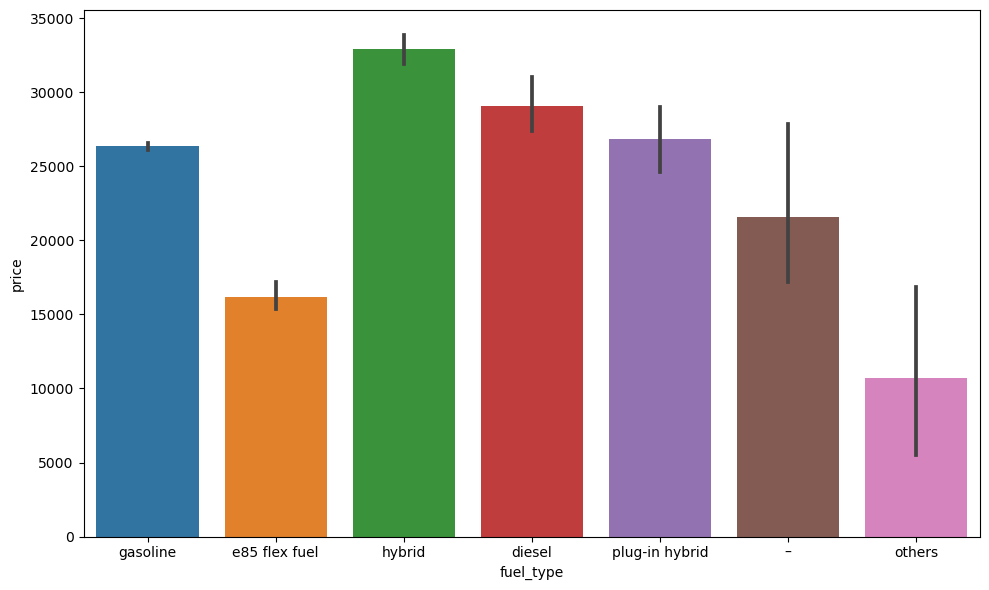

In [74]:
plt.figure(figsize=(10,6))
sns.barplot(x='fuel_type',y='price',data=df)
plt.tight_layout()

# needed to handle null but got stuck with categories like '-' and 'not supported'

C:\Users\Mayank\AppData\Local\Temp\ipykernel_16380\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

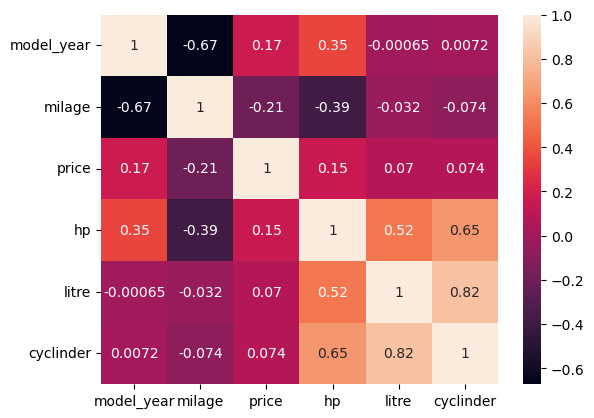

In [64]:
sns.heatmap(df.corr(),annot=True)

In [62]:
df.corr()['price']

C:\Users\Mayank\AppData\Local\Temp\ipykernel_16380\441180871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


model_year    0.170135
milage       -0.207208
price         1.000000
hp            0.152095
litre         0.069639
cyclinder     0.074278
Name: price, dtype: float64

In [61]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'transmission',
       'ext_col', 'int_col', 'accident', 'clean_title', 'price', 'hp', 'litre',
       'cyclinder'],
      dtype='object')

## 6. EDA wrt transmission

In [29]:
df['transmission'].value_counts()
# we can apply one hot encoding for categories having value count greate than 10,000
# and remaing categories will be in another encoded column

a/t                                                   83036
8-speed a/t                                           34601
transmission w/dual shift mode                        32079
6-speed a/t                                           30105
6-speed m/t                                           19863
7-speed a/t                                           18498
automatic                                             17866
8-speed automatic                                     13977
10-speed a/t                                          13347
9-speed a/t                                            6450
5-speed a/t                                            5458
10-speed automatic                                     5268
6-speed automatic                                      4690
4-speed a/t                                            4212
5-speed m/t                                            4048
9-speed automatic                                      3878
cvt transmission                        

In [30]:
df['transmission'].unique()

array(['a/t', 'transmission w/dual shift mode', '7-speed a/t',
       '8-speed a/t', '10-speed automatic', '1-speed a/t', '6-speed a/t',
       '10-speed a/t', '9-speed a/t', '8-speed automatic',
       '9-speed automatic', '5-speed a/t', 'automatic',
       '7-speed automatic with auto-shift', 'cvt transmission',
       '5-speed m/t', 'm/t', '6-speed m/t', '6-speed automatic',
       '4-speed automatic', '7-speed m/t', '2-speed a/t',
       '1-speed automatic', 'automatic cvt', '4-speed a/t',
       '6-speed manual', 'transmission overdrive switch',
       '8-speed automatic with auto-shift', '7-speed manual',
       '7-speed automatic', '9-speed automatic with auto-shift',
       '6-speed automatic with auto-shift',
       '6-speed electronically controlled automatic with o', 'f', 'cvt-f',
       '8-speed manual', 'manual', '–', '2', '6 speed at/mt',
       '5-speed automatic', '2-speed automatic', '7-speed', 'variable',
       'single-speed fixed gear', '8-speed at',
       '10-spee

## Pre-Processing

### Engine ------------------------->

In [31]:
df.head(4)

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,hp,litre,cyclinder
0,mini,cooper s base,2007,213000,gasoline,a/t,yellow,gray,none reported,yes,4200,172.0,1.6,4.0
1,lincoln,ls v8,2002,143250,gasoline,a/t,silver,beige,at least 1 accident or damage reported,yes,4999,252.0,3.9,8.0
2,chevrolet,silverado 2500 lt,2002,136731,e85 flex fuel,a/t,blue,gray,none reported,yes,13900,320.0,5.3,8.0
3,genesis,g90 5.0 ultimate,2017,19500,gasoline,transmission w/dual shift mode,black,black,none reported,yes,45000,420.0,5.0,8.0


In [32]:
df.isnull().mean()*100

brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        2.694265
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         1.299714
clean_title     11.347992
price            0.000000
hp               0.000000
litre            0.000000
cyclinder        0.000000
dtype: float64

In [33]:
print(df['litre'].unique())
print(df['cyclinder'].unique())

[1.6       3.9       5.3       5.        2.        3.        2.7
 3.6       3.8046063 6.2       4.4       4.        4.6       5.2
 3.7       5.7       6.7       3.5       2.8       5.5       5.4
 6.8       3.8       2.5       3.4       2.4       3.3       2.3
 3.2       4.7       1.8       6.        4.8       5.6       4.3
 4.2       1.5       6.4       8.3       6.3       2.1       1.4
 4.5       1.3       2.9       1.7       6.6       2.2       6.1
 7.3       6.5       0.65      6.75      7.        1.        5.9
 8.1       5.8       1.2       8.4       8.        7.4      ]
[ 4.          8.          6.          6.37355205 10.         12.
  5.          3.        ]


In [34]:
for i in sorted(df['litre'].unique()):
    Engine = df[df['litre'] == i][['litre','cyclinder']]
    print(Engine.head())

       litre  cyclinder
1686    0.65   6.373552
7262    0.65   6.373552
7766    0.65   6.373552
11441   0.65   6.373552
13393   0.65   6.373552
        litre  cyclinder
3286      1.0        3.0
107057    1.0        3.0
120372    1.0        3.0
       litre  cyclinder
9091     1.2   6.373552
11738    1.2   6.373552
30055    1.2   6.373552
33311    1.2   6.373552
35583    1.2   6.373552
      litre  cyclinder
548     1.3   6.373552
1419    1.3   6.373552
3758    1.3   6.373552
3774    1.3   6.373552
5163    1.3   6.373552
      litre  cyclinder
467     1.4        4.0
659     1.4        4.0
1229    1.4        4.0
1309    1.4        4.0
1794    1.4        4.0
      litre  cyclinder
360     1.5   6.373552
820     1.5   6.373552
1605    1.5   3.000000
1738    1.5   4.000000
2225    1.5   4.000000
      litre  cyclinder
0       1.6        4.0
90      1.6        4.0
397     1.6        4.0
728     1.6        4.0
1184    1.6        4.0
       litre  cyclinder
752      1.7        4.0
7053     1.7

       litre  cyclinder
10061    8.4       10.0
26001    8.4       10.0
26942    8.4       10.0
39761    8.4       10.0
54416    8.4       10.0


In [35]:
# 0.65 - 1.5 --> 3
# 1.5 - 2.5 --> 4
# 2.7 - 3.9 -- > 6
# 4.2 - 7.4 -- > 8
# 8.0 - 8.4 -- > 10

In [36]:
# 1: litre and cylinder -->  fill vallue: central tendenyc
# 2: manullay impurte -->

#----------------------------------------

In [37]:
for i in sorted(df['cyclinder'].unique()):
    Engine = df[df['cyclinder'] == i][['litre','cyclinder']]
    print([Engine['litre'].min() , Engine['litre'].max()] , i)

[1.0, 1.6] 3.0
[1.4, 2.7] 4.0
[2.5, 3.7] 5.0
[2.5, 6.7] 6.0
[0.65, 8.0] 6.373552054391007
[3.8, 8.1] 8.0
[5.0, 8.4] 10.0
[3.8046063000254633, 6.7] 12.0


In [38]:
## we will impute this value in this perticular range ok!!

In [39]:
## we have to also try nan removal approach

In [40]:
#------------- CENTRAN TENDENCY INPITE

In [41]:
df['clean_title'].isnull().sum()/len(df)*100

11.3479917128918

In [42]:
df['hp'].skew()

0.9324091766293578

C:\Users\Mayank\AppData\Local\Temp\ipykernel_16380\432275835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['hp']


<Axes: xlabel='hp', ylabel='Density'>

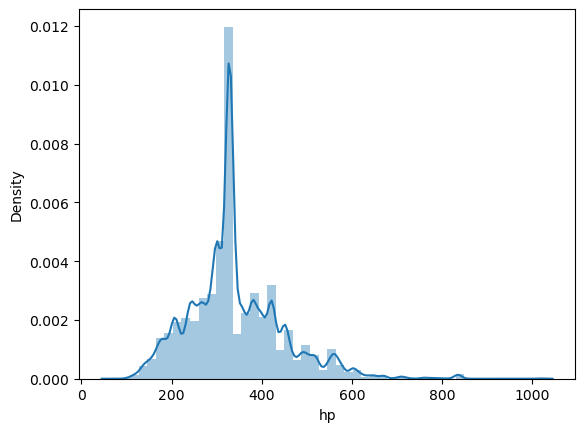

In [43]:
sns.distplot(df['hp']
            )

In [44]:
## cylinder: mean and median--> skew and graph: --> rule
## litre: mean and median--> skew and graph: --> rule
## hp: mean and median--> skew and graph: --> rule

<Axes: xlabel='cyclinder', ylabel='Density'>

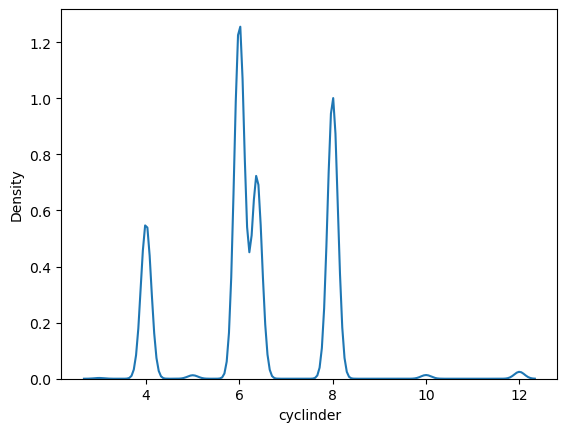

In [45]:
sns.kdeplot(df['cyclinder'])

In [46]:
# ----------------------------------------------------------------------------------------------------------------------------

In [47]:
#### ext_col	int_col------------------>

In [48]:
# EDA

In [49]:
df['ext_col'].unique()

array(['yellow', 'silver', 'blue', 'black', 'white',
       'snowflake white pearl metallic', 'gray', 'green',
       'santorini black metallic', 'purple', 'ebony twilight metallic',
       'red', 'magnetite black metallic', 'diamond black', 'vega blue',
       'beige', 'gold', 'platinum white pearl', 'metallic',
       'white frost tri-coat', 'firecracker red clearcoat',
       'phytonic blue metallic', 'blu', 'orange', 'brown',
       'brilliant silver metallic', 'black raven', 'black clearcoat',
       'firenze red', 'agate black metallic', 'glacial white pearl',
       'majestic plum metallic', 'designo diamond white metallic',
       'oxford white', 'black sapphire metallic', 'mythos black',
       'granite crystal clearcoat metallic', 'white diamond tri-coat',
       'magnetite gray metallic', 'carpathian grey premium metallic',
       'designo diamond white bright',
       'phantom black pearl effect / black roof', 'nebula gray pearl',
       'deep crystal blue mica', 'flame red

In [50]:
df['int_col'].unique()

array(['gray', 'beige', 'black', '–', 'blue', 'white', 'red', 'brown',
       'dark galvanized', 'parchment.', 'boulder', 'orange',
       'medium earth gray', 'ebony', 'canberra beige', 'jet black',
       'silver', 'light platinum / jet black', 'macchiato/magmagrey',
       'gold', 'cloud', 'rioja red', 'global black', 'green',
       'medium stone', 'navy pier', 'dark ash', 'portland', 'sandstone',
       'canberra beige/black', 'diesel gray / black', 'sarder brown',
       'black onyx', 'white / brown', 'black/gun metal', 'slate',
       'satin black', 'macchiato beige/black', 'charcoal',
       'black / express red', 'cappuccino', 'aragon brown', 'parchment',
       'oyster w/contrast', 'adrenaline red', 'ebony.', 'shara beige',
       'graystone', 'pearl beige', 'nero ade', 'graphite',
       'tan/ebony/ebony', 'charcoal black', 'medium ash gray',
       'ebony black', 'light titanium', 'sakhir orange', 'tan',
       'rock gray', 'brandy', 'carbon black', 'amber',
       'black w

In [51]:
len(df['int_col'].unique())

152

In [52]:
len(df['ext_col'].unique())

317

In [53]:
# df.drop(columns=['int_col'],inplace=True) ## removing int_col due to partial dependency

In [54]:
df.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,hp,litre,cyclinder
0,mini,cooper s base,2007,213000,gasoline,a/t,yellow,gray,none reported,yes,4200,172.0,1.6,4.0
1,lincoln,ls v8,2002,143250,gasoline,a/t,silver,beige,at least 1 accident or damage reported,yes,4999,252.0,3.9,8.0
2,chevrolet,silverado 2500 lt,2002,136731,e85 flex fuel,a/t,blue,gray,none reported,yes,13900,320.0,5.3,8.0
3,genesis,g90 5.0 ultimate,2017,19500,gasoline,transmission w/dual shift mode,black,black,none reported,yes,45000,420.0,5.0,8.0
4,mercedes-benz,metris base,2021,7388,gasoline,7-speed a/t,black,beige,none reported,yes,97500,208.0,2.0,4.0


In [55]:
# ----------------------------------------------------------------------------------------------------------------------------

In [56]:
### Transmission------------------------->

In [57]:
df['transmission'].unique()

array(['a/t', 'transmission w/dual shift mode', '7-speed a/t',
       '8-speed a/t', '10-speed automatic', '1-speed a/t', '6-speed a/t',
       '10-speed a/t', '9-speed a/t', '8-speed automatic',
       '9-speed automatic', '5-speed a/t', 'automatic',
       '7-speed automatic with auto-shift', 'cvt transmission',
       '5-speed m/t', 'm/t', '6-speed m/t', '6-speed automatic',
       '4-speed automatic', '7-speed m/t', '2-speed a/t',
       '1-speed automatic', 'automatic cvt', '4-speed a/t',
       '6-speed manual', 'transmission overdrive switch',
       '8-speed automatic with auto-shift', '7-speed manual',
       '7-speed automatic', '9-speed automatic with auto-shift',
       '6-speed automatic with auto-shift',
       '6-speed electronically controlled automatic with o', 'f', 'cvt-f',
       '8-speed manual', 'manual', '–', '2', '6 speed at/mt',
       '5-speed automatic', '2-speed automatic', '7-speed', 'variable',
       'single-speed fixed gear', '8-speed at',
       '10-spee

In [58]:
len(df['transmission'].unique())

51

In [59]:
at_trans = df[df['transmission'] == 'A/T'][['transmission','price']]

In [60]:
at_trans.head()

,transmission,price
